In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the data set

In [2]:
df = pd.read_excel('C:/users/joelj/Downloads/Bankruptcy_data(1).xlsx')
df1 = df.copy()
df1.head() 


,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [3]:
# renaming few features for ease of coding 
new_names = {"EPS":"eps","Liquidity":"liquidity","Profitability":"profitability","Productivity":"productivity","Leverage Ratio":"leverage_ratio",
             "Asset Turnover":"asset_turnover","Operational Margin":"operational_margin","Return on Equity":"return_on_equity",
             "Market Book Ratio":"market_book_ratio","Assets Growth":"assets_growth","Sales Growth":"sales_growth","Employee Growth":"employee_growth",
             "BK":"bk"}
df1 = df1.rename(columns=new_names)
df1.head()

,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


EDA


In [4]:
df1.shape

(92872, 13)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   eps                 92867 non-null  float64
 1   liquidity           92625 non-null  float64
 2   profitability       92625 non-null  float64
 3   productivity        92625 non-null  float64
 4   leverage_ratio      92846 non-null  float64
 5   asset_turnover      92625 non-null  float64
 6   operational_margin  87315 non-null  float64
 7   return_on_equity    92864 non-null  float64
 8   market_book_ratio   92815 non-null  float64
 9   assets_growth       86171 non-null  float64
 10  sales_growth        86171 non-null  float64
 11  employee_growth     85862 non-null  float64
 12  bk                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [6]:
df1.isna().sum() # gives no of missing values

eps                      5
liquidity              247
profitability          247
productivity           247
leverage_ratio          26
asset_turnover         247
operational_margin    5557
return_on_equity         8
market_book_ratio       57
assets_growth         6701
sales_growth          6701
employee_growth       7010
bk                       0
dtype: int64

In [7]:
# percentage of missing values
(df1.isna().sum()/len(df1)) * 100


eps                   0.005384
liquidity             0.265957
profitability         0.265957
productivity          0.265957
leverage_ratio        0.027996
asset_turnover        0.265957
operational_margin    5.983504
return_on_equity      0.008614
market_book_ratio     0.061375
assets_growth         7.215307
sales_growth          7.215307
employee_growth       7.548023
bk                    0.000000
dtype: float64

In [8]:
# Finding the number of unique values
df1.nunique()
# Percentage of values
(df1.nunique()/len(df1)) * 100
""" Some Features such as MBR,AG,SG,EG shows high variability  
due to high number of unique values which could induce noise in the model """


' Some Features such as MBR,AG,SG,EG shows high variability  \ndue to high number of unique values which could induce noise in the model '

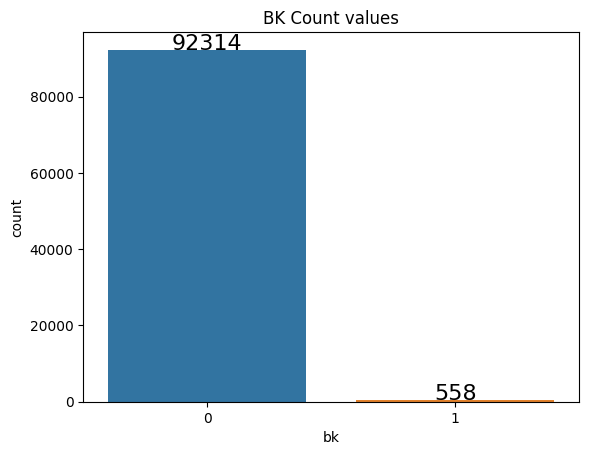

In [9]:
a = df1['bk'].value_counts()
sns.countplot(data=df1,x="bk")
plt.title("BK Count values")
for i,j in enumerate(a):
    plt.text(i,j+8,f'{j}',ha='center',fontsize=16)
plt.show()


In [10]:
df1['bk'].value_counts()
# Percentage of missing values
print((df1['bk'].value_counts()/len(df1))*100)
# Shows highly imbalanced data
"""Things that could be considered Ensemble Methods,anomaly detection and evualting the metrics"""

bk
0    99.399173
1     0.600827
Name: count, dtype: float64


'Things that could be considered Ensemble Methods,anomaly detection and evualting the metrics'

In [11]:
df1.describe()

,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


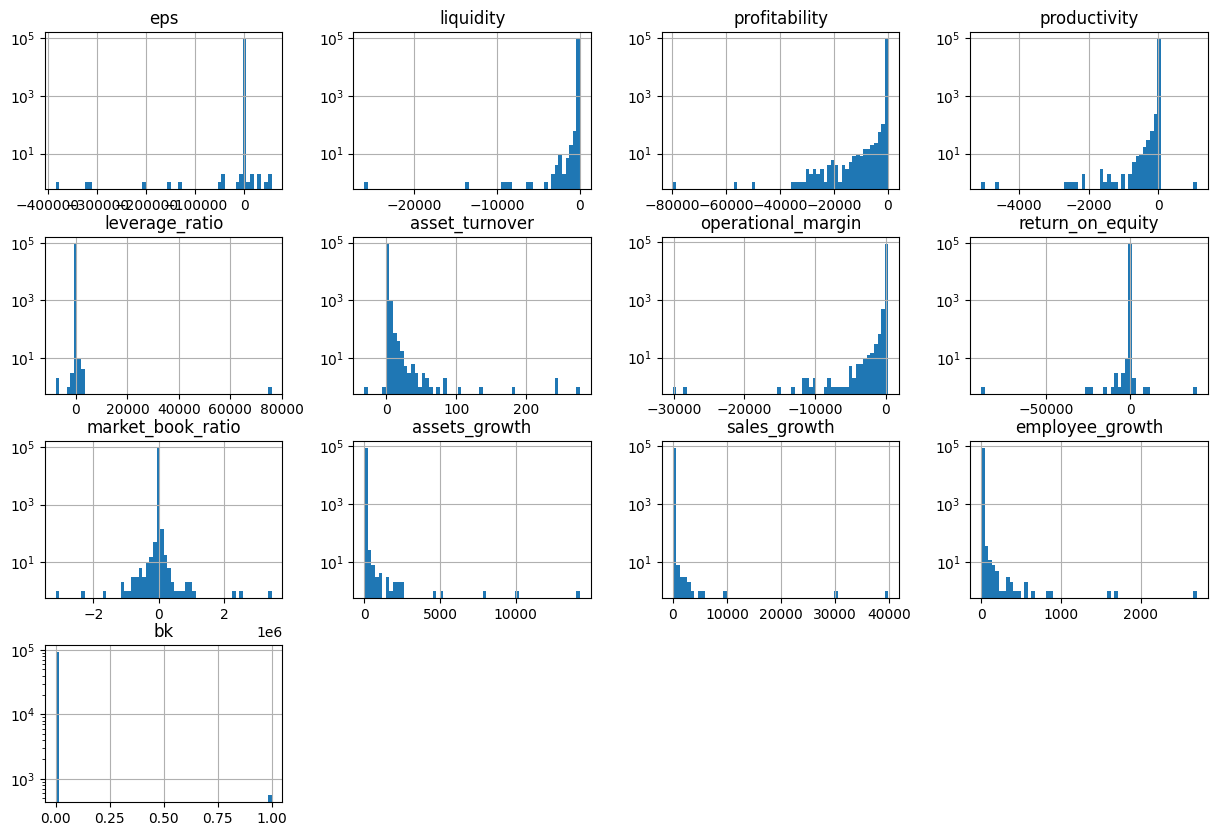

In [12]:
select_dtypes = df1.select_dtypes(["float64","int64"])
select_dtypes.hist(bins=60,figsize=(15,10),log=True) # logarithm function is set as the magnitude of range is very large for better visualisation
plt.show()

Data Peprocessing


In [13]:
# Clearing missing vaalues
# MBR and RE is filled with mean values as it is normally distributed
for i in df1.columns:
    if i in ['market_book_ratio', 'return_on_equity']:
        df1[i] = df1[i].fillna(df1[i].mean())
    else:
        df1[i] = df1[i].fillna(df1[i].median())

 

In a normal distribution, the data is symmetrically distributed around the mean, with the same number of values falling on either side
Whereas Skewness refers to the asymmetry of the data distribution. When the data is skewed, the distribution is not symmetrical, and the mean may be influenced by extreme values or outliers.
by using the median, the  measure of central tendency that is less influenced by extreme values"

In [14]:
# Checking if there are null values
df1.isna().sum()

eps                   0
liquidity             0
profitability         0
productivity          0
leverage_ratio        0
asset_turnover        0
operational_margin    0
return_on_equity      0
market_book_ratio     0
assets_growth         0
sales_growth          0
employee_growth       0
bk                    0
dtype: int64

Cheking Outliers


In [15]:
df1.describe()

,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
count,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,9.287200e+04,92872.000000,92872.000000,92872.000000,92872.000000
mean,-14.460559,-2.623734,-29.458531,-1.219459,1.345018,1.053018,-7.438272,-2.112382,3.585063e+02,1.204445,1.767320,0.318709,0.006008
std,2195.408190,121.449182,676.331204,35.837865,253.002671,2.113161,207.953537,352.581715,2.605564e+04,71.059050,171.104894,13.532844,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.630000,-0.060000,0.000000,0.390000,-0.020000,-0.080000,1.122000e+01,-0.041112,-0.021171,-0.038836,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.838000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.380000,0.130000,0.070000,2.409850e+02,0.174523,0.187012,0.115836,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


From the description it seems like there are extreme values which need to be looked as it could be undetected in outlier detection,
So one way would be checking the outliers after transformation using box-cloz


In [16]:
select_dtypes.head()

,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [17]:
from sklearn.preprocessing import PowerTransformer
new_selected_dtypes = df1.select_dtypes(["float64"])
print(df1.isna().sum())
power = PowerTransformer(method='yeo-johnson', standardize=True) #The Yeo-Johnson transformation is a power transformation that can handle both positive and negative skewness
data_trans = power.fit_transform(new_selected_dtypes)
data_trans_new = pd.DataFrame(data_trans) # converting arrays to dataframe
df1_new = data_trans_new.copy() # coping exactly same dataframe to a new variable
column_names = {"0":"eps","1":"liquidity","2":"profitability","3":"productivity","4":"leverage_ratio",
             "5":"asset_turnover","6":"operational_margin","7":"return_on_equity",
             "8":"market_book_ratio","9":"assets_growth","10":"sales_growth","11":"employee_growth",
             "12":"bk"
             }
df1_new.columns = df1_new.columns.astype(str) # this is done to convert keys to int to str
df1_new.rename(columns=column_names,inplace=True)
# Assuming df1 and df2 are the two DataFrames, and you want to add a column 'column_name' from df2 to df1
df1_new = df1_new.merge(df1['bk'], left_index=True,right_index=True)
df1_new.head()

eps                   0
liquidity             0
profitability         0
productivity          0
leverage_ratio        0
asset_turnover        0
operational_margin    0
return_on_equity      0
market_book_ratio     0
assets_growth         0
sales_growth          0
employee_growth       0
bk                    0
dtype: int64


,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
0,0.000277,0.344027,0.138756,0.042368,0.010174,0.701177,0.062723,0.003513,-0.017871,0.014146,-0.055820,-0.011960,0
1,0.000106,0.344027,0.140166,0.041711,0.010024,0.556281,0.062723,0.003445,-0.017864,0.201250,-0.100119,0.060029,0
2,-0.000968,0.211283,0.131813,0.039093,0.007908,0.523470,0.061328,0.003139,-0.017858,0.694321,0.179500,1.250280,0
3,-0.000585,0.085380,0.133187,0.039093,0.006146,0.389835,0.062024,0.003173,-0.017754,-0.189699,-0.238848,-0.404459,0
4,-0.000546,0.519814,0.131813,0.039093,0.001421,0.312885,0.062024,0.003139,-0.017624,0.437821,0.025134,0.099336,0


I chose to apply the Yeo-Johnson transformation to correct the skewness in the data. Skewness refers to the asymmetry in the distribution of a variable. When a variable is highly skewed, it can negatively impact the performance of certain machine learning algorithms that assume a symmetric distribution.

The Yeo-Johnson transformation is a power transformation method that can effectively handle both positively and negatively skewed data. It can transform the data to a more symmetric distribution by applying different power transformations based on the nature of the skewness. This transformation allows for better normalization of the data and can improve the performance of the model.

By applying the Yeo-Johnson transformation, I aimed to reduce the skewness in the features of my dataset, making them more suitable for modeling and improving the overall performance of my bankruptcy prediction model.

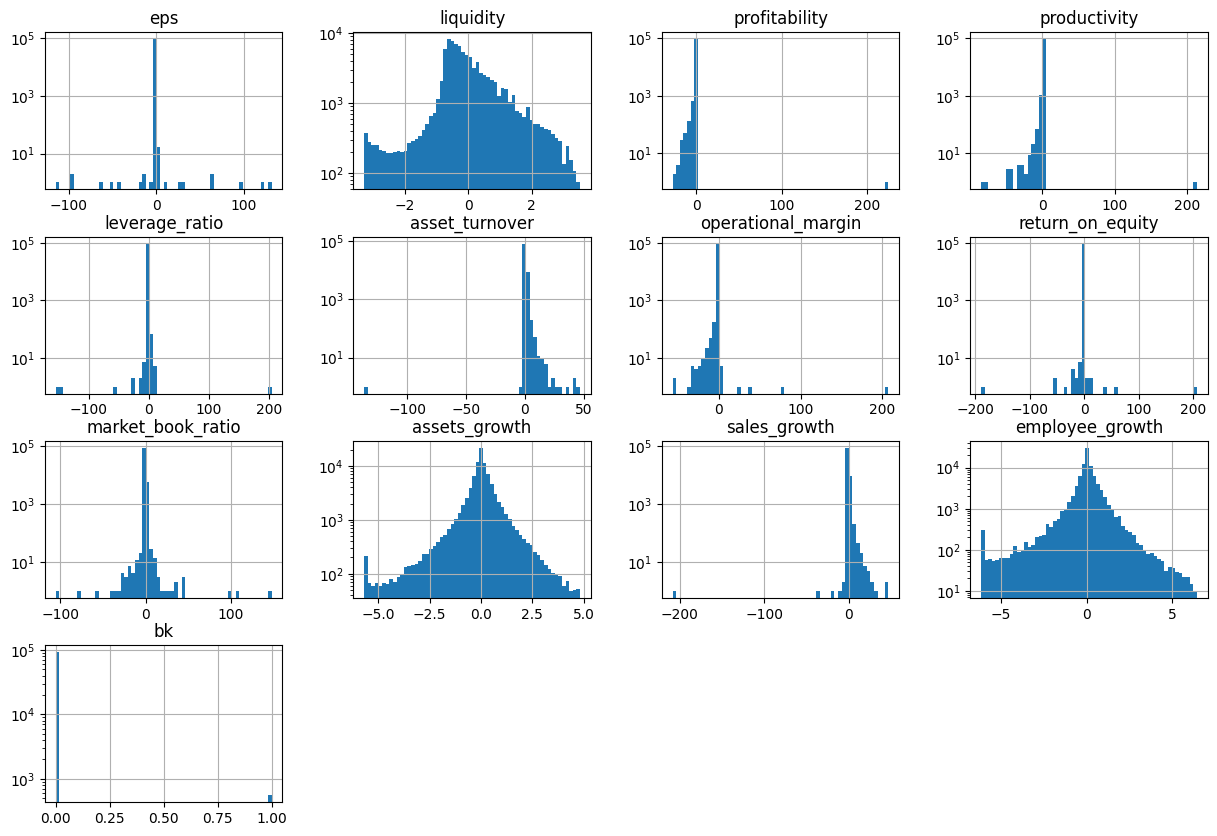

In [18]:
select_dtypes_new = df1_new.select_dtypes(["float64","int64"])
select_dtypes_new.hist(bins=60,figsize=(15,10),log=True) # logarithm function is set as the magnitude of range is very large for better visualisation
plt.show()

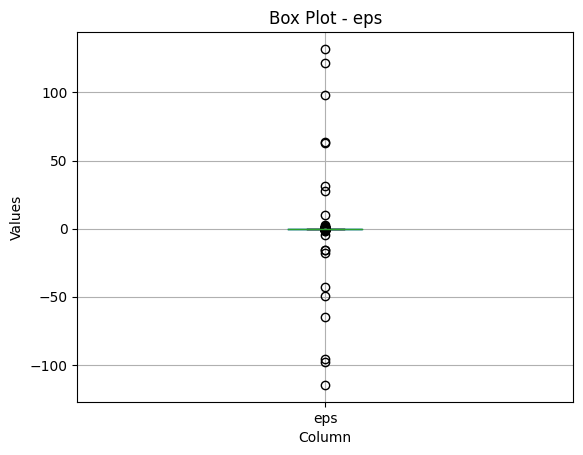

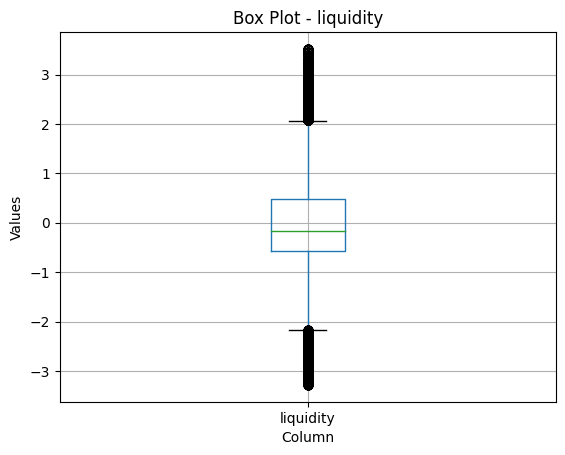

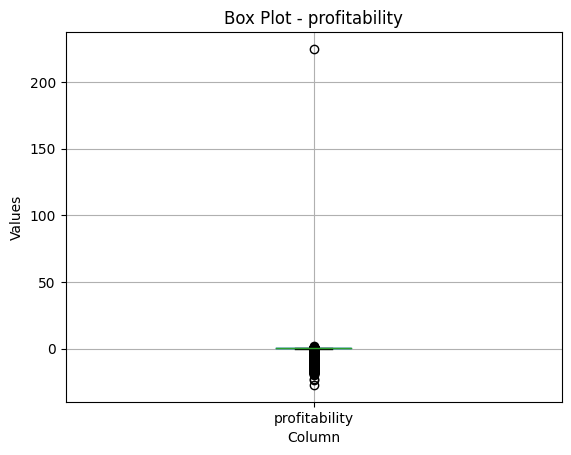

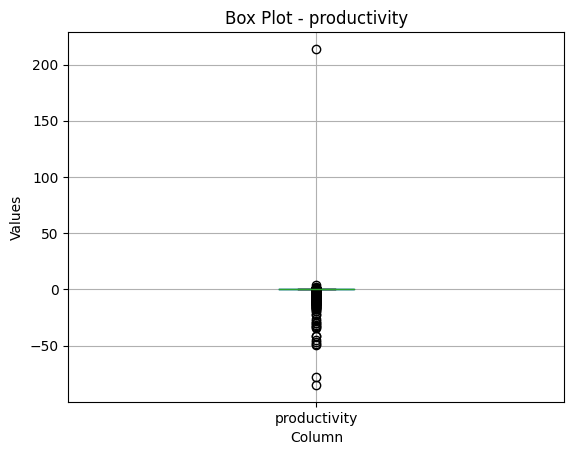

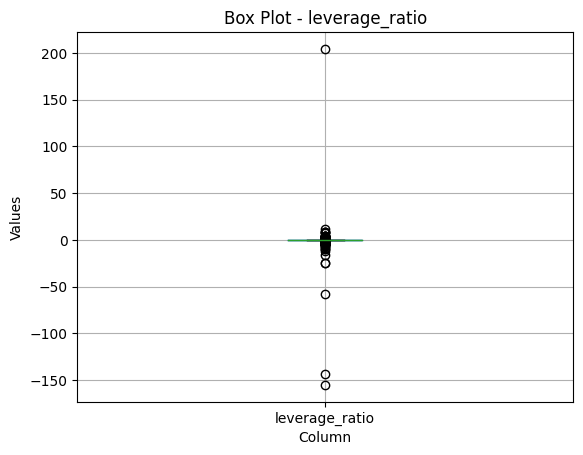

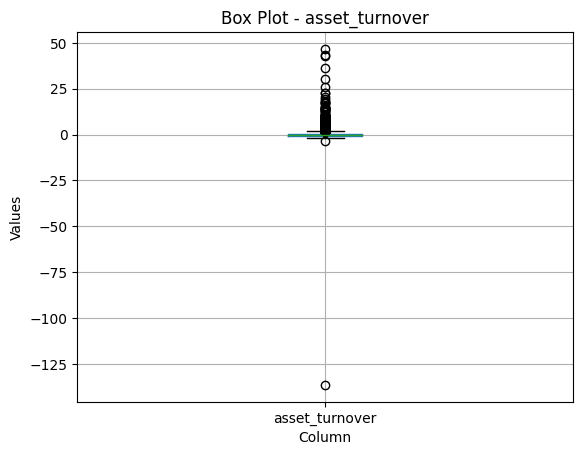

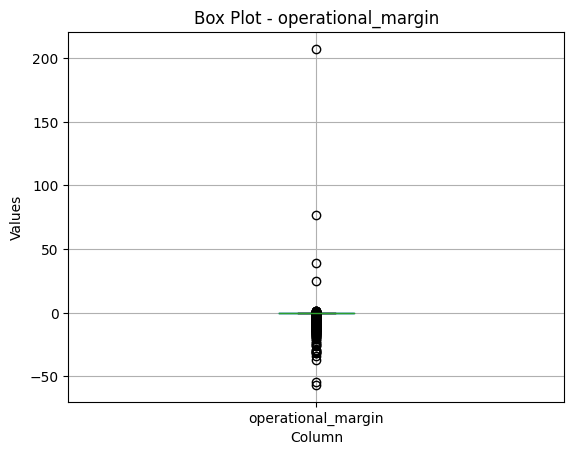

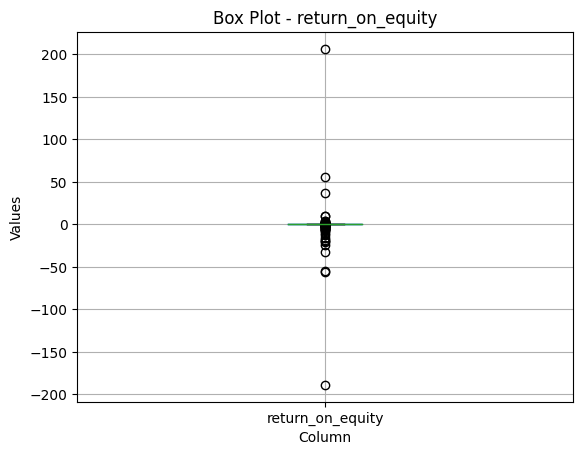

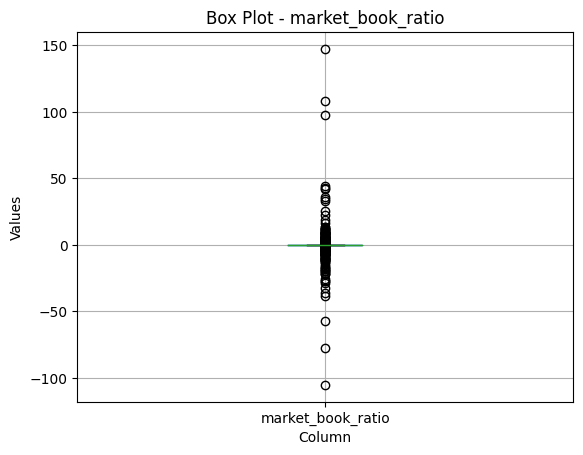

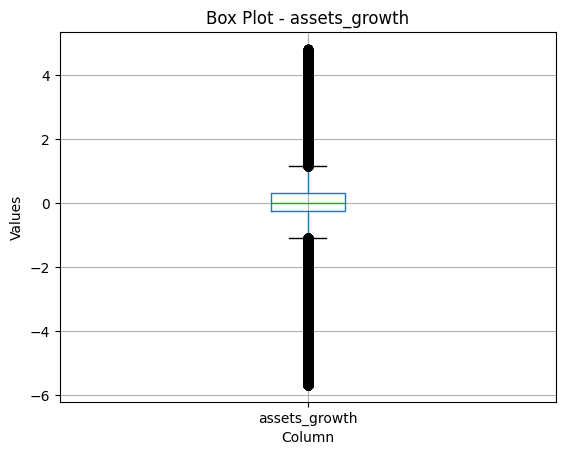

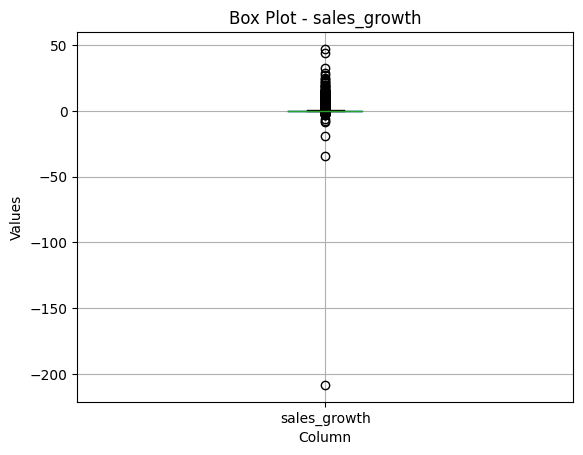

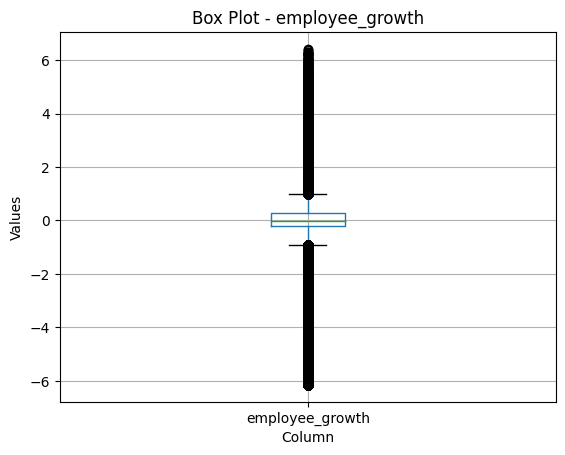

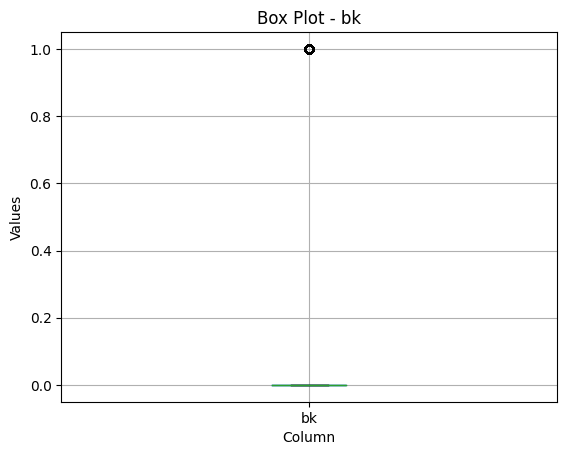

In [19]:
#Checking outliers in all features
class BoxPlotter:
    def __init__(self, df):
        self.df = df
    
    def create_boxplots(self):
        for column in self.df.columns:
            # Create a box plot for the current column
            fig, ax = plt.subplots()
            self.df.boxplot(column=column, ax=ax)
            ax.set_title(f'Box Plot - {column}')
            ax.set_ylabel('Values')
            ax.set_xlabel('Column')
            plt.show()
boxplotter = BoxPlotter(df1_new)
boxplotter.create_boxplots()

Except employee_growth,assets_growth and liquity , rest other features has outliers that need to be examined and possibly removed

In [20]:
# Creating a function for selecting specific columns
class DataFrameSelector:
    def __init__(self, df):
        self.df = df
    
    def select_columns(self, columns_to_exclude): # This is the method
        selected_columns = self.df.drop(columns_to_exclude, axis=1)
        return selected_columns
# Instance of the class
selector = DataFrameSelector(df1_new)
columns_to_exclude = ['employee_growth','assets_growth','liquidity','bk']
outlier_columns = selector.select_columns(columns_to_exclude)
# Now creating a For loop for removing outliers in those columns 
for column in outlier_columns:
    # Calculate Q1 and Q3
    Q1 = df1_new[column].quantile(0.25)
    Q3 = df1_new[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = df1_new[(df1_new[column] < lower_bound) | (df1_new[column] > upper_bound)]
    # Remove outliers
    df2 = df1_new[(df1_new[column] >= lower_bound) & (df1_new[column] <= upper_bound)]
df2.head()

,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
0,0.000277,0.344027,0.138756,0.042368,0.010174,0.701177,0.062723,0.003513,-0.017871,0.014146,-0.055820,-0.011960,0
1,0.000106,0.344027,0.140166,0.041711,0.010024,0.556281,0.062723,0.003445,-0.017864,0.201250,-0.100119,0.060029,0
2,-0.000968,0.211283,0.131813,0.039093,0.007908,0.523470,0.061328,0.003139,-0.017858,0.694321,0.179500,1.250280,0
3,-0.000585,0.085380,0.133187,0.039093,0.006146,0.389835,0.062024,0.003173,-0.017754,-0.189699,-0.238848,-0.404459,0
4,-0.000546,0.519814,0.131813,0.039093,0.001421,0.312885,0.062024,0.003139,-0.017624,0.437821,0.025134,0.099336,0


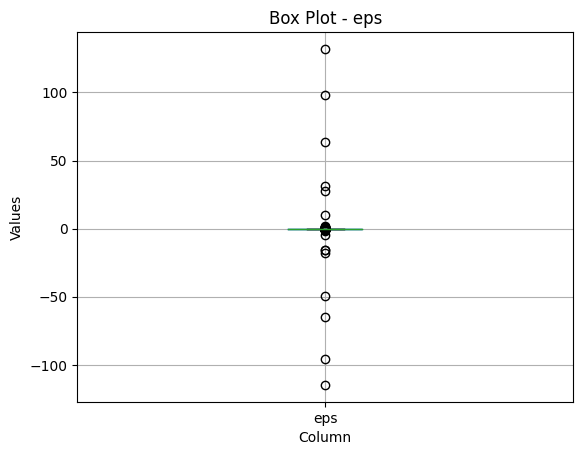

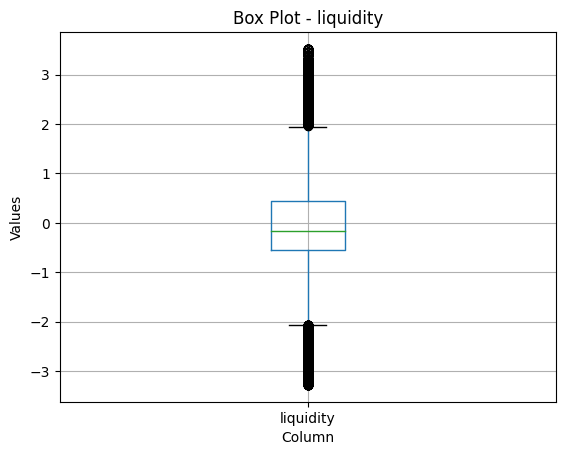

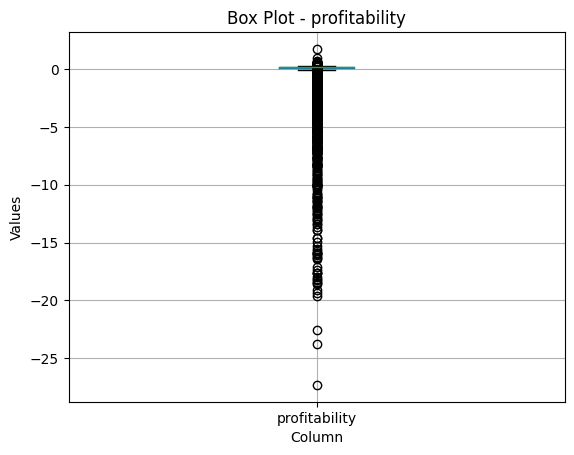

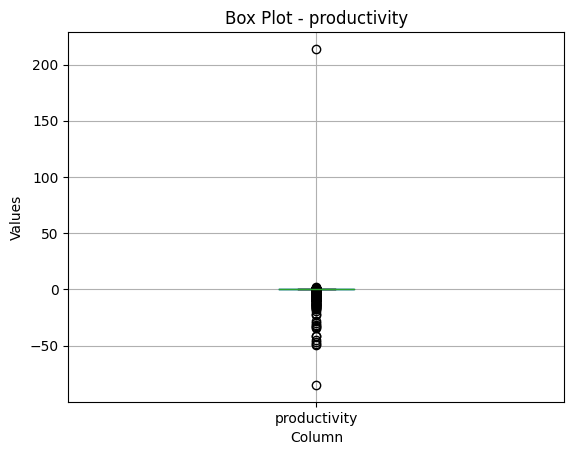

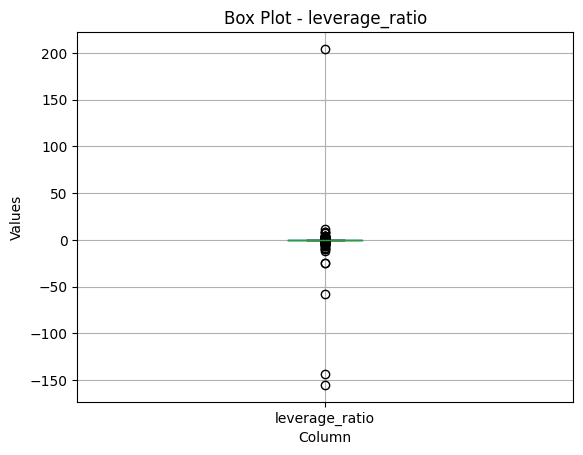

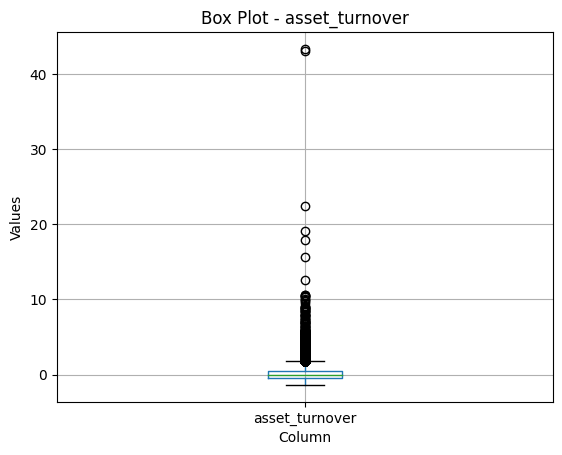

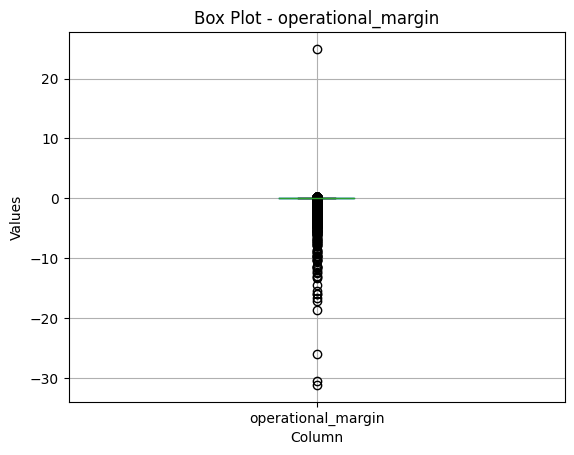

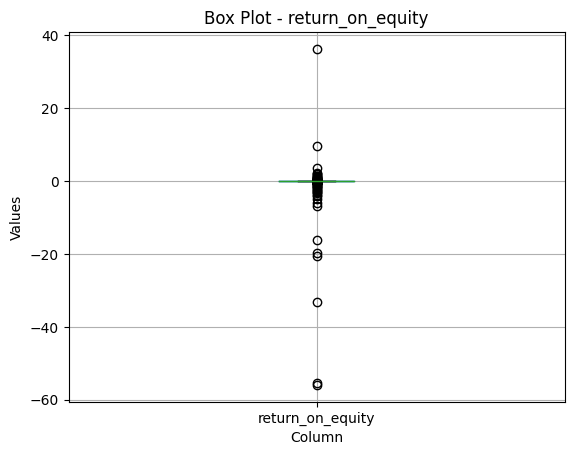

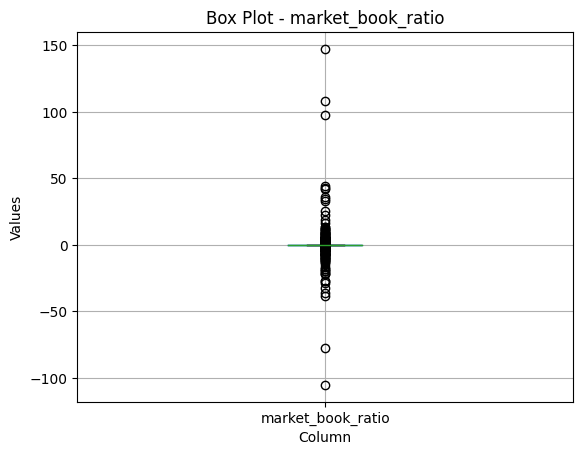

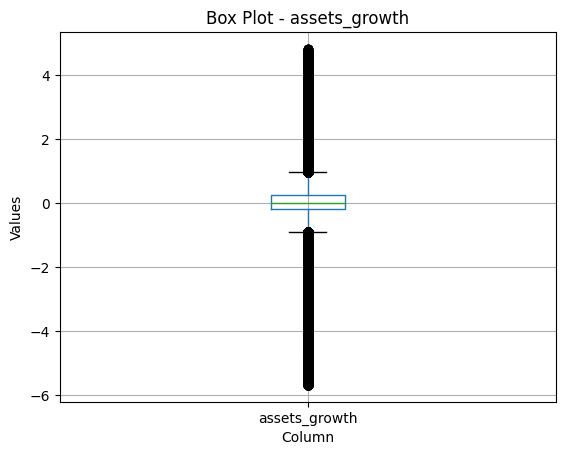

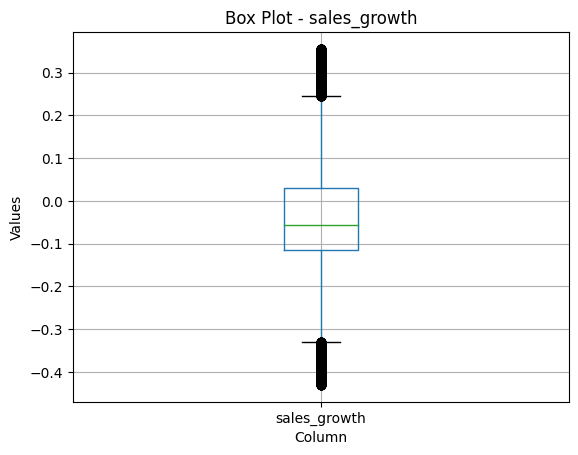

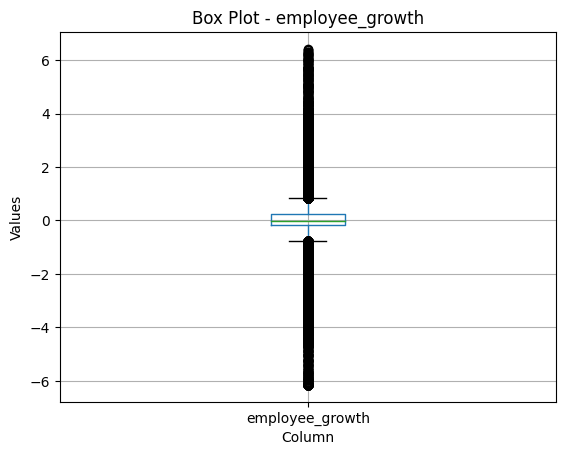

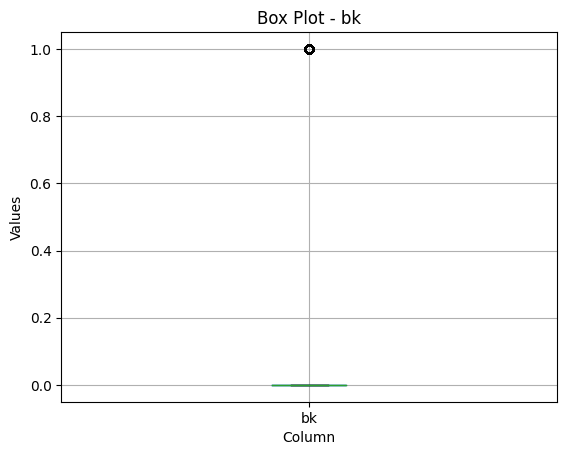

In [21]:
#Checking the boxplot of new dataframe
boxplotter2 = BoxPlotter(df2)
boxplotter2.create_boxplots()

As seeing the boxplot the changes are not identifiable I have used describe function to check the statistics

In [22]:
df1_new.describe()

,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
count,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,9.287200e+04,92872.000000
mean,7.268236e-19,-1.897392e-17,1.216473e-17,4.666972e-18,-4.590465e-19,1.689291e-16,-3.136818e-18,3.825387e-19,-2.754279e-18,1.162918e-17,1.468949e-17,-1.606663e-17,0.006008
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.077280
min,-1.147623e+02,-3.283721e+00,-2.730901e+01,-8.500632e+01,-1.550220e+02,-1.364329e+02,-5.658100e+01,-1.888730e+02,-1.051564e+02,-5.671294e+00,-2.083243e+02,-6.149982e+00,0.000000
25%,-1.386242e-03,-5.770651e-01,4.604578e-02,3.007386e-02,-2.074853e-04,-5.601489e-01,5.652861e-02,2.732243e-03,-1.752592e-02,-2.508979e-01,-1.357305e-01,-1.985438e-01,0.000000
50%,-9.495588e-04,-1.736913e-01,1.237234e-01,3.779128e-02,2.063876e-03,-1.133316e-01,6.202400e-02,3.104829e-03,-1.569265e-02,1.414594e-02,-5.581980e-02,-1.196035e-02,0.000000
75%,2.261924e-04,4.837676e-01,1.576453e-01,4.105469e-02,6.300305e-03,3.813503e-01,6.696992e-02,3.240762e-03,-8.503302e-03,3.122606e-01,6.093466e-02,2.815957e-01,0.000000
max,1.319294e+02,3.521003e+00,2.249817e+02,2.138757e+02,2.042734e+02,4.671246e+01,2.073878e+02,2.064635e+02,1.473330e+02,4.809687e+00,4.711193e+01,6.425364e+00,1.000000


In [23]:
df2.describe()

,eps,liquidity,profitability,productivity,leverage_ratio,asset_turnover,operational_margin,return_on_equity,market_book_ratio,assets_growth,sales_growth,employee_growth,bk
count,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000,78417.000000
mean,-0.000346,0.005449,0.030158,0.006762,0.000019,0.041793,0.029965,-0.000046,0.002614,0.008490,-0.046808,0.013832,0.004400
std,0.895017,0.935885,0.628855,1.023486,1.085282,0.816520,0.405157,0.357526,1.051883,0.798359,0.143937,0.763965,0.066184
min,-114.762289,-3.282894,-27.309012,-85.006321,-155.021971,-1.386897,-31.184286,-55.923999,-105.156416,-5.671294,-0.430710,-6.149982,0.000000
25%,-0.001322,-0.556282,0.075143,0.033269,-0.000125,-0.495789,0.059255,0.002868,-0.017477,-0.202331,-0.114975,-0.170546,0.000000
50%,-0.000768,-0.173691,0.129087,0.038442,0.002384,-0.065804,0.062723,0.003139,-0.015604,0.014146,-0.055820,-0.011960,0.000000
75%,0.000398,0.448168,0.162172,0.041711,0.006454,0.423614,0.067687,0.003241,-0.008163,0.259431,0.029325,0.232839,0.000000
max,131.929404,3.521003,1.731188,213.875670,204.273421,43.389166,24.989895,36.220156,147.332954,4.809687,0.355857,6.425364,1.000000


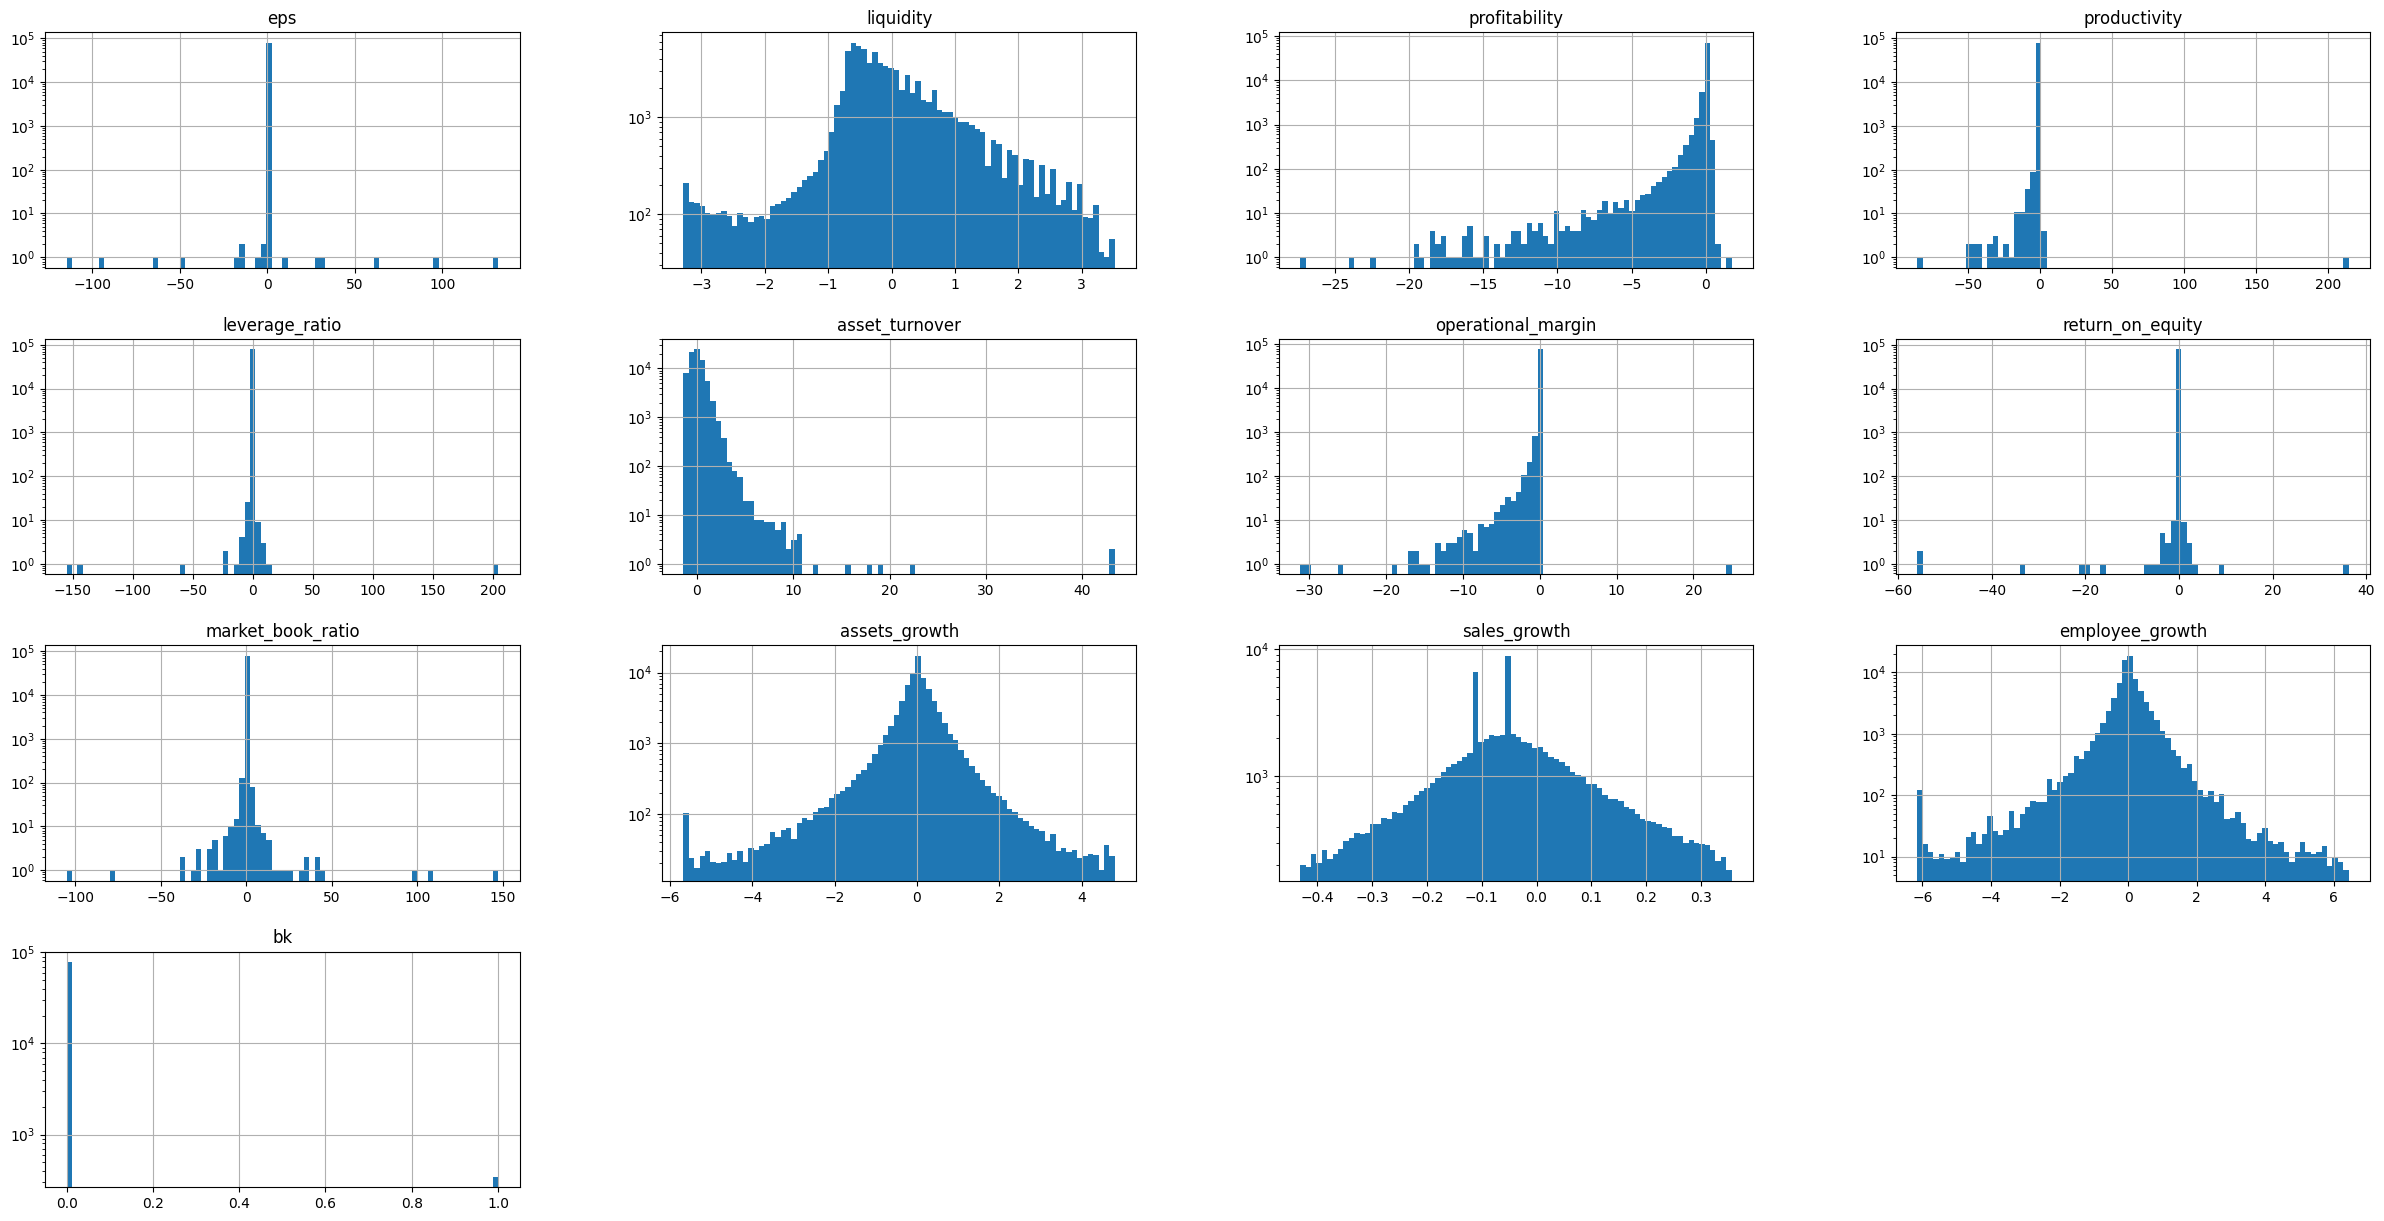

In [24]:
df2.hist(column = df2.columns, bins = 80, figsize = (30,15),log = True)
plt.show()

Modelling

In [25]:
df2['bk'].value_counts()

bk
0    78072
1      345
Name: count, dtype: int64

In [26]:
# Splitting the dataset
y = df2['bk']
X = df2.drop(['bk'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


Resampling of dataset is done as it is imbalanced.
The method used is SMOTE - which stands for Synthetic Minority Oversampling Technique 


In [27]:
from imblearn.over_sampling import SMOTE

In [28]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_metrics(x, y):
    cm = confusion_matrix(x, y)
    accuracy = accuracy_score(x, y)
    precision = precision_score(x, y)
    recall = recall_score(x, y)
    f1 = f1_score(x, y)
    
    return cm, accuracy, precision, recall, f1



cm, accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[15466   148]
 [   50    20]]
Accuracy: 0.9873756694720734
Precision: 0.11904761904761904
Recall: 0.2857142857142857
F1 Score: 0.1680672268907563


In [31]:
# Classification report 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15614
           1       0.12      0.29      0.17        70

    accuracy                           0.99     15684
   macro avg       0.56      0.64      0.58     15684
weighted avg       0.99      0.99      0.99     15684



Accuracy: The overall accuracy of the model is 0.99, which indicates that a large proportion of the predictions are correct.

Precision: The precision for class 1 is 0.13, which means that out of all the instances predicted as class 1, only 13% are actually true positives. The high precision for class 0 (1.00) suggests that the model is good at correctly identifying instances of class 0.

Recall: The recall (also known as sensitivity or true positive rate) for class 1 is 0.29, indicating that the model is able to capture only 29% of the instances belonging to class 1. This means that there is a significant number of false negatives. 

F1-score: The F1-score for class 1 is 0.18, which is a harmonic mean of precision and recall. It represents the balance between precision and recall. The low F1-score suggests that the model's performance on class 1 is poor.

This means the metric focused shall be recall as the model needs to be better in capturing True positives.

SVM 

In [32]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_classifier.predict(X_test)
#Checking classification report
print(classification_report(y_test, y_pred_svm))
# Performance metric
cm_svm, accuracy_svm, precision_svm, recall_svm, f1_svm = get_metrics(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


              precision    recall  f1-score   support

           0       1.00      0.84      0.91     15614
           1       0.02      0.63      0.03        70

    accuracy                           0.84     15684
   macro avg       0.51      0.73      0.47     15684
weighted avg       0.99      0.84      0.91     15684

Confusion Matrix:
[[13061  2553]
 [   26    44]]
Accuracy: 0.8355649069115022
Precision: 0.016942626107046593
Recall: 0.6285714285714286
F1 Score: 0.032995875515560553


From two models recall score for SVM is better than Random Forest which is 62.3%, also TP is better for SVM this means that the SVM model is better at capturing positive instances (bankrupt companies) out of all the actual positive instances in the data. Futurer conclusions can be made after cross validation analysis

HyperParameter Tuning and analysis


GridSearchCV is not done as it takes long computational time for the results.

In [33]:
from sklearn.model_selection import cross_val_score
scores_rf =cross_val_score(rf ,X_train_resampled,y_train_resampled,
                        cv=5,scoring='recall')
scores_rf
print('The average recall is' ,"", np.mean(scores_rf))

The average recall is  0.9994556387996092


The initial recall of 0.2857 suggests that the model was initially performing poorly in capturing positive instances. However, the cross-validation results show that the model's performance has significantly improved, with recall scores close to 1.0. This indicates that the model is now much better at correctly identifying positive instances and has a high ability to detect instances of bankruptcy.

In [34]:
scores_svm =cross_val_score(svm_classifier ,X_train_resampled,y_train_resampled,
                        cv=5,scoring='recall')
scores_svm
print('The average recall is' ,"", np.mean(scores_svm))

The average recall is  0.6706747205730681


This shows there wasnt much improvement in the recall performance of the SVM model after cross validation. So the better model seems to be RandomForestClassifier out of the two model.

Feature Engineering 

Checking for any multicollinearity issues in order to improve the model

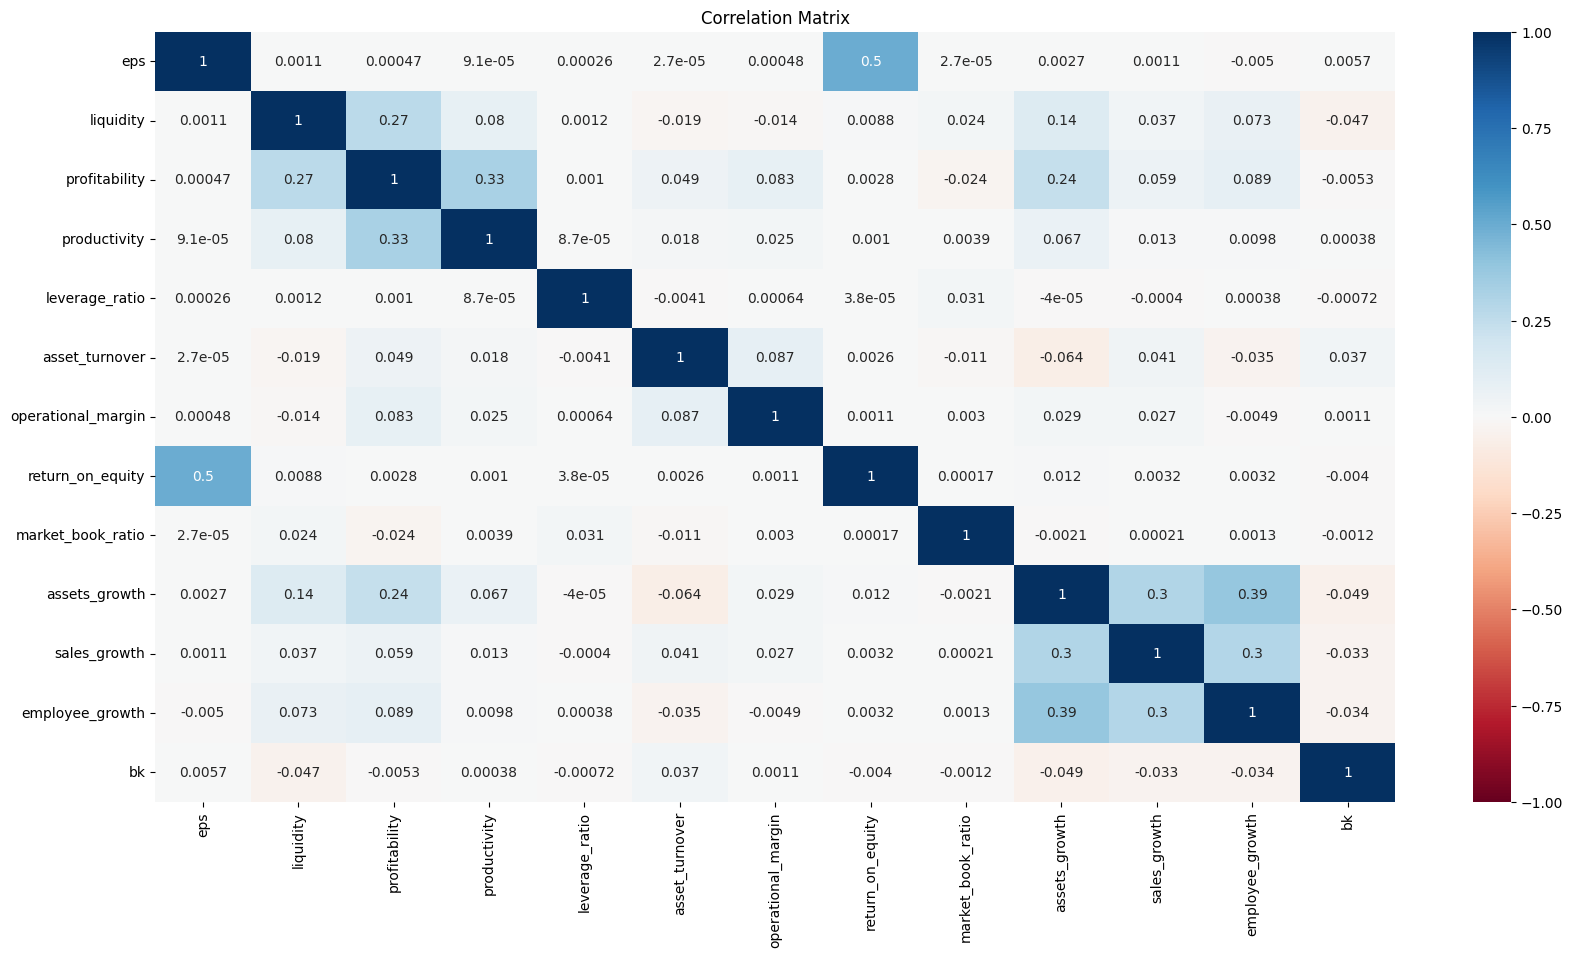

In [48]:
correlation_matrix = df2.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()




Since there are no significant correlation between the independent feature, there are no multicollinearity issue. 

So As concluded earlier Random forest classifier trained model is selected for the bankruptcy prediction model